In [7]:
import os
os.chdir("/Users/charlieshi/Desktop/olist-clv-seg")

In [11]:
import pandas as pd
df = pd.read_parquet("data/interim/customer_wide.parquet")
print(df.shape)
print(df.head())

(95420, 6)
                 customer_unique_id            first_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27+00:00   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27+00:00   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03+00:00   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41+00:00   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42+00:00   

              last_purchase  orders_count  total_gross  avg_item_price  
0 2018-05-10 10:56:27+00:00             1       141.90          129.90  
1 2018-05-07 11:11:27+00:00             1        27.19           18.90  
2 2017-03-10 21:05:03+00:00             1        86.22           69.00  
3 2017-10-12 20:29:41+00:00             1        43.62           25.99  
4 2017-11-14 19:45:42+00:00             1       196.89          180.00  


In [10]:
import pandas as pd
df = pd.read_parquet("data/interim/line_items.parquet")
print(df.shape)
print(df.head())

(112650, 18)
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  2018-08-15 10:10:18   12

In [20]:
import pandas as pd
df = pd.read_parquet("data/features/customer_features.parquet")
print(df.shape)
df.head(3)

(95420, 11)


,customer_unique_id,Recency,Frequency,Monetary,lifetime_days,avg_purchase_interval,avg_review_score,bad_review_rate,avg_installments,credit_share,payment_variety
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0,0.0,5.0,0.0,8.0,1.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,0,0.0,4.0,0.0,1.0,1.0,1.0
2,0000f46a3911fa3c0805444483337064,538,1,86.22,0,0.0,3.0,0.0,8.0,1.0,1.0


   segment_kmeans  Recency  Frequency  Monetary  avg_review_score  \
0               2   222.30       2.11    324.81              4.15   
1               1   243.22       1.00    189.83              1.22   
2               0   239.52       1.00    156.28              4.57   

   bad_review_rate  credit_share  count     share  
0             0.13          0.76   2919  0.030591  
1             1.00          0.76  13088  0.137162  
2             0.00          0.76  79413  0.832247  


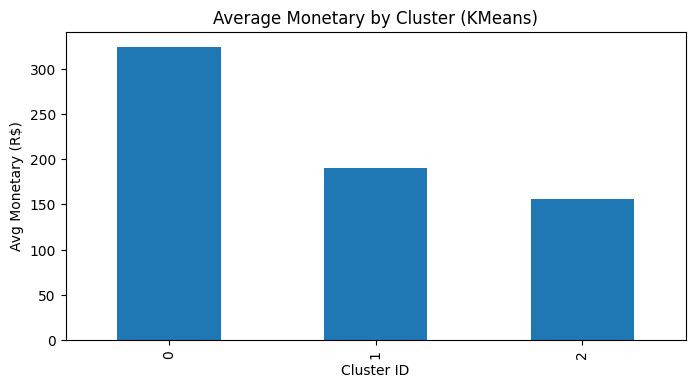

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

seg = pd.read_parquet("data/features/customer_segments_kmeans.parquet")
profile = pd.read_csv("data/features/segment_profiles.csv")
print(profile)

# 分簇对比图
plt.figure(figsize=(8,4))
profile["Monetary"].plot(kind="bar")
plt.title("Average Monetary by Cluster (KMeans)")
plt.xlabel("Cluster ID")
plt.ylabel("Avg Monetary (R$)")
plt.show()

In [23]:
import pandas as pd
df = pd.read_parquet("data/outputs/CLV_ML_20251105.parquet")
print(df.head(5))
print("\n描述性统计:\n", df["clv_ml_pred"].describe())
print("\nTop 1% 平均值:", df["clv_ml_pred"].nlargest(int(0.01*len(df))).mean())

                 customer_unique_id  clv_ml_pred
0  0000366f3b9a7992bf8c76cfdf3221e2    -0.000006
1  0000b849f77a49e4a4ce2b2a4ca5be3f    -0.000003
2  0000f46a3911fa3c0805444483337064    -0.000005
3  0000f6ccb0745a6a4b88665a16c9f078    -0.000003
4  0004aac84e0df4da2b147fca70cf8255    -0.000007

描述性统计:
 count    9.542000e+04
mean     6.105429e-04
std      1.881536e-01
min     -2.893011e-01
25%     -3.566792e-06
50%     -2.037017e-06
75%      6.565471e-07
max      5.811681e+01
Name: clv_ml_pred, dtype: float64

Top 1% 平均值: 0.063251235


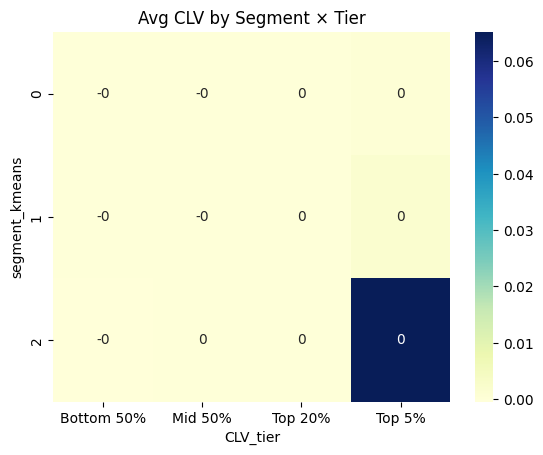

In [27]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.read_csv("data/outputs/CLV_segment_matrix.csv")
pivot = df.pivot(index="segment_kmeans", columns="CLV_tier", values="avg_clv")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Avg CLV by Segment × Tier")
plt.show()

count    95420.000000
mean         0.000611
std          0.188154
min         -0.289301
50%         -0.000002
90%          0.000009
99%          0.000350
99.9%        0.002634
max         58.116810
Name: clv_ml_pred, dtype: float64


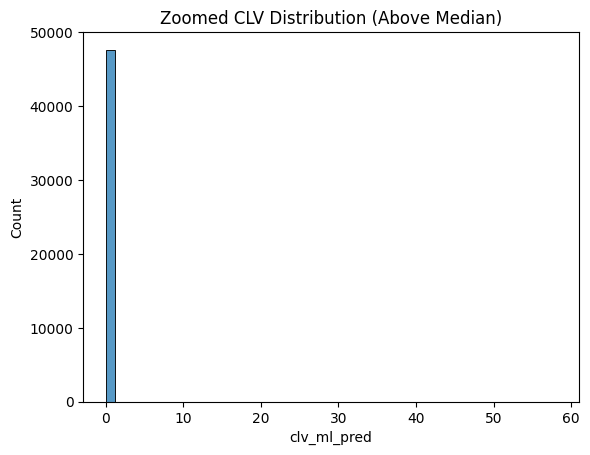

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_parquet("data/outputs/CLV_ML_20251105.parquet")

print(df["clv_ml_pred"].describe(percentiles=[.5,.9,.99,.999]))

# 放大尾部 (去掉最常见的0值或很低值)
sns.histplot(df[df["clv_ml_pred"] > np.percentile(df["clv_ml_pred"], 50)]["clv_ml_pred"], bins=50)
plt.title("Zoomed CLV Distribution (Above Median)")
plt.show()

In [15]:
import pandas as pd

df = pd.read_parquet("data/features//customer_clv_ml.parquet")
print("Shape:", df.shape)
print(df.head(5))
print(df["clv_ml_pred"].describe(percentiles=[.5, .9, .99, .999]))

# 检查是否有大量为 0 或负数的情况
print("\nZero count:", (df["clv_ml_pred"] == 0).sum())
print("Negative count:", (df["clv_ml_pred"] < 0).sum())

# 看看极值
print("\nTop 10 values:")
print(df["clv_ml_pred"].nlargest(10))

Shape: (95420, 2)
                 customer_unique_id  clv_ml_pred
0  0000366f3b9a7992bf8c76cfdf3221e2    50.527939
1  0000b849f77a49e4a4ce2b2a4ca5be3f    10.208943
2  0000f46a3911fa3c0805444483337064    -0.760757
3  0000f6ccb0745a6a4b88665a16c9f078    -0.520484
4  0004aac84e0df4da2b147fca70cf8255    -0.032625
count    95420.000000
mean        24.168203
std         58.134094
min        -27.276928
50%          0.340975
90%         64.941429
99%        245.992040
99.9%      769.561379
max       1953.415894
Name: clv_ml_pred, dtype: float64

Zero count: 0
Negative count: 26795

Top 10 values:
44139    1953.415894
26015    1809.827759
74752    1519.308838
75462    1279.265259
35528    1269.443115
60486    1176.216553
27242    1158.257935
26264    1086.953247
55742    1067.604370
33003    1058.259766
Name: clv_ml_pred, dtype: float32


In [16]:
import pandas as pd

df = pd.read_parquet("data/outputs//CLV_ML_20251106.parquet")
print("Shape:", df.shape)
print(df.head(5))
print(df["clv_ml_pred"].describe(percentiles=[.5, .9, .99, .999]))

# 检查是否有大量为 0 或负数的情况
print("\nZero count:", (df["clv_ml_pred"] == 0).sum())
print("Negative count:", (df["clv_ml_pred"] < 0).sum())

# 看看极值
print("\nTop 10 values:")
print(df["clv_ml_pred"].nlargest(10))

Shape: (95420, 2)
                 customer_unique_id  clv_ml_pred
0  0000366f3b9a7992bf8c76cfdf3221e2    50.527939
1  0000b849f77a49e4a4ce2b2a4ca5be3f    10.208943
2  0000f46a3911fa3c0805444483337064    -0.760757
3  0000f6ccb0745a6a4b88665a16c9f078    -0.520484
4  0004aac84e0df4da2b147fca70cf8255    -0.032625
count    95420.000000
mean        24.168203
std         58.134094
min        -27.276928
50%          0.340975
90%         64.941429
99%        245.992040
99.9%      769.561379
max       1953.415894
Name: clv_ml_pred, dtype: float64

Zero count: 0
Negative count: 26795

Top 10 values:
44139    1953.415894
26015    1809.827759
74752    1519.308838
75462    1279.265259
35528    1269.443115
60486    1176.216553
27242    1158.257935
26264    1086.953247
55742    1067.604370
33003    1058.259766
Name: clv_ml_pred, dtype: float32


In [17]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.histplot(clv["clv_ml_pred"].clip(lower=0), bins=100, log_scale=(False, True), color="#3182bd")
plt.title("CLV (ML) Distribution (log-scaled)")
plt.xlabel("Predicted CLV")
plt.ylabel("Customer Count (log scale)")
plt.xlim(0, 1000)  # 可选：截取更清晰范围
plt.tight_layout()
plt.show()

NameError: name 'clv' is not defined

<Figure size 800x400 with 0 Axes>